In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [13]:
data = np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2]
])

In [14]:
data = pd.DataFrame(data,columns=['X','Y','Z'])

In [15]:
data

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [17]:
# 1.Standardize values
st_data = (data-data.mean())/data.std()
st_data

,X,Y,Z
0,0.878745,0.578857,0.477697
1,-1.668342,-1.429422,-1.242013
2,0.496682,1.169527,0.859855
3,0.114619,0.342589,0.286618
4,1.642872,1.287661,1.433092
5,0.624036,0.933259,1.050934
6,0.241973,-0.366216,-0.095539
7,-1.031570,-0.956886,-1.050934
8,-0.394799,-0.366216,-0.286618
9,-0.904216,-1.193154,-1.433092


In [18]:
# 2.covariance matrix
cov_matrix = np.cov(st_data.T)
cov_matrix

array([[1.        , 0.92592927, 0.93688744],
       [0.92592927, 1.        , 0.98192228],
       [0.93688744, 0.98192228, 1.        ]])

In [19]:
# 3.eigen values and vecors
eig_val, eig_vec = np.linalg.eig(cov_matrix)
eig_val

array([2.89670115, 0.08582574, 0.01747311])

In [20]:
eig_vec

array([[ 0.57041595,  0.81767389, -0.07768556],
       [ 0.57969966, -0.46779003, -0.66717374],
       [ 0.58187108, -0.33553224,  0.74084017]])

In [22]:
# 4.sort eigenvalues and eigen vectors
sorted_indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[sorted_indices]
eig_vec = eig_vec[:,sorted_indices]

In [23]:
eig_val

array([2.89670115, 0.08582574, 0.01747311])

In [24]:
eig_vec

array([[ 0.57041595,  0.81767389, -0.07768556],
       [ 0.57969966, -0.46779003, -0.66717374],
       [ 0.58187108, -0.33553224,  0.74084017]])

In [25]:
# 5.select top 2 eigen vectors
selected_eig_vec = eig_vec[:,:2]
selected_eig_vec

array([[ 0.57041595,  0.81767389],
       [ 0.57969966, -0.46779003],
       [ 0.58187108, -0.33553224]])

In [28]:
# 6.project data to new basis
reduced_data = st_data.to_numpy().dot(selected_eig_vec)
reduced_df = pd.DataFrame(reduced_data,columns=['PC1','PC2'])
print("\nReduced Data(after PCA)\n",reduced_df)


Reduced Data(after PCA)
         PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.278755
2  1.461615 -0.429478
3  0.430754 -0.162708
4  2.517452  0.260130
5  1.508478 -0.278933
6 -0.129861  0.401224
7 -1.754639 -0.043244
8 -0.604269 -0.055335
9 -2.041325  0.299640


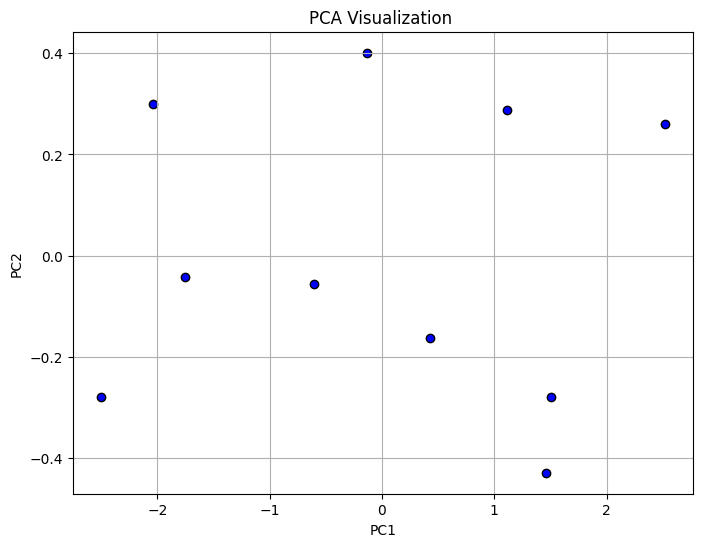

In [29]:
# visualize
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'],color='blue',edgecolor='k')
plt.title('2-D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization ')
plt.grid(True)
plt.show()